# Visual exploratory data analysis

Are you more likely to get arrested at a certain time of day? 
Are drug-related stops on the rise? In this chapter, you will answer 
these and other questions by analyzing the dataset visually, since plots 
can help you to understand trends in a way that examining the raw data cannot.



## Does time of day affect arrest rate?

1) Analyzing datetime data

2) Accessing datetime attributes

3) Calculating the monthly mean price

4) Resampling the price

5) Concatenating price and volume

6) Computing a frequency table

7) Mapping one set of values to another

In [84]:
import pandas as pd

apple = pd.read_csv('./Data/aal.csv', index_col = 0)
apple

,date,time,price,volume,change
0,2/13/2018,16:00,164.34,21075906,up
1,2/14/2018,16:00,167.37,62531550,up
2,2/15/2018,16:00,172.99,27979650,up
3,3/13/2018,16:00,173.45,31095700,up
4,3/14/2018,16:00,174.60,43156892,up
5,3/15/2018,16:00,174.80,33568497,up
6,4/13/2018,16:00,173.50,41365985,down
7,4/14/2018,16:00,173.00,23985674,down
8,4/15/2018,16:00,165.50,58964726,down


In [85]:
# The below-mentioned few codes are picked from Chapter-1

apple.date.str.replace('/', '-')

0    2-13-2018
1    2-14-2018
2    2-15-2018
3    3-13-2018
4    3-14-2018
5    3-15-2018
6    4-13-2018
7    4-14-2018
8    4-15-2018
Name: date, dtype: object

In [86]:
combined = apple.date.str.cat(apple.time, sep=' ')

In [87]:
combined

0    2/13/2018 16:00
1    2/14/2018 16:00
2    2/15/2018 16:00
3    3/13/2018 16:00
4    3/14/2018 16:00
5    3/15/2018 16:00
6    4/13/2018 16:00
7    4/14/2018 16:00
8    4/15/2018 16:00
Name: date, dtype: object

In [88]:
apple['date_and_time'] = pd.to_datetime(combined)
apple

,date,time,price,volume,change,date_and_time
0,2/13/2018,16:00,164.34,21075906,up,2018-02-13 16:00:00
1,2/14/2018,16:00,167.37,62531550,up,2018-02-14 16:00:00
2,2/15/2018,16:00,172.99,27979650,up,2018-02-15 16:00:00
3,3/13/2018,16:00,173.45,31095700,up,2018-03-13 16:00:00
4,3/14/2018,16:00,174.60,43156892,up,2018-03-14 16:00:00
5,3/15/2018,16:00,174.80,33568497,up,2018-03-15 16:00:00
6,4/13/2018,16:00,173.50,41365985,down,2018-04-13 16:00:00
7,4/14/2018,16:00,173.00,23985674,down,2018-04-14 16:00:00
8,4/15/2018,16:00,165.50,58964726,down,2018-04-15 16:00:00


In [89]:
apple.dtypes

date                     object
time                     object
price                   float64
volume                    int64
change                   object
date_and_time    datetime64[ns]
dtype: object

In [90]:
apple.date_and_time.dt.month

0    2
1    2
2    2
3    3
4    3
5    3
6    4
7    4
8    4
Name: date_and_time, dtype: int64

## Accessing datetime attributes (2)

In [91]:
apple.set_index('date_and_time', inplace=True)
apple.index

DatetimeIndex(['2018-02-13 16:00:00', '2018-02-14 16:00:00',
               '2018-02-15 16:00:00', '2018-03-13 16:00:00',
               '2018-03-14 16:00:00', '2018-03-15 16:00:00',
               '2018-04-13 16:00:00', '2018-04-14 16:00:00',
               '2018-04-15 16:00:00'],
              dtype='datetime64[ns]', name='date_and_time', freq=None)

In [92]:
apple.price.mean()

171.06111111111113

In [93]:
apple.groupby(apple.index.month).price.mean()

date_and_time
2    168.233333
3    174.283333
4    170.666667
Name: price, dtype: float64

In [94]:
monthly_price = apple.groupby(apple.index.month).price.mean()

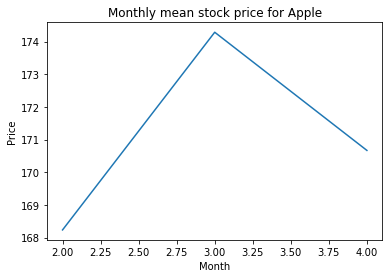

In [95]:
import matplotlib.pyplot as plt
monthly_price.plot()

# Line plot: Series index on x-axis, Series values on y-axis

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly mean stock price for Apple')
plt.show()

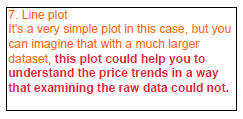

## Resampling the price

In [96]:
apple.groupby(apple.index.month).price.mean()

date_and_time
2    168.233333
3    174.283333
4    170.666667
Name: price, dtype: float64

In [97]:
apple.price.resample('M').mean()

date_and_time
2018-02-28    168.233333
2018-03-31    174.283333
2018-04-30    170.666667
Freq: M, Name: price, dtype: float64

## Resampling the volume

In [98]:
apple

,date,time,price,volume,change
date_and_time,,,,,
2018-02-13 16:00:00,2/13/2018,16:00,164.34,21075906,up
2018-02-14 16:00:00,2/14/2018,16:00,167.37,62531550,up
2018-02-15 16:00:00,2/15/2018,16:00,172.99,27979650,up
2018-03-13 16:00:00,3/13/2018,16:00,173.45,31095700,up
2018-03-14 16:00:00,3/14/2018,16:00,174.60,43156892,up
2018-03-15 16:00:00,3/15/2018,16:00,174.80,33568497,up
2018-04-13 16:00:00,4/13/2018,16:00,173.50,41365985,down
2018-04-14 16:00:00,4/14/2018,16:00,173.00,23985674,down
2018-04-15 16:00:00,4/15/2018,16:00,165.50,58964726,down


In [99]:
apple.volume.resample('M').mean()

date_and_time
2018-02-28    37195702.0
2018-03-31    35940363.0
2018-04-30    41438795.0
Freq: M, Name: volume, dtype: float64

## Concatenating price and volume

In [100]:
monthly_price = apple.price.resample('M').mean()
monthly_volume = apple.volume.resample('M').mean()

pd.concat([monthly_price, monthly_volume], axis='columns')

,price,volume
date_and_time,,
2018-02-28,168.233333,37195702.0
2018-03-31,174.283333,35940363.0
2018-04-30,170.666667,41438795.0


In [101]:
monthly = pd.concat([monthly_price, monthly_volume],
axis='columns')

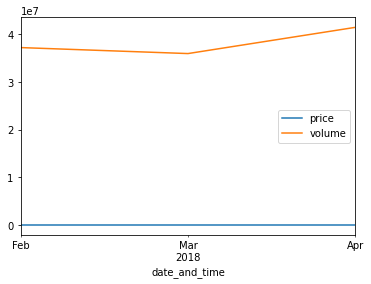

In [102]:
monthly.plot()
plt.show()

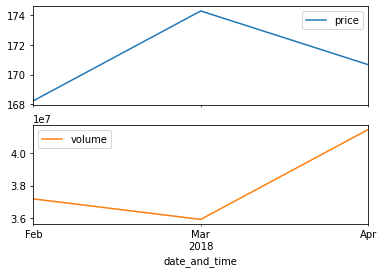

In [103]:
monthly.plot(subplots=True)
plt.show()

### What violations are caught in each district?

In [104]:
ri = pd.read_csv('./Data/police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [105]:
pd.crosstab(ri.driver_race, ri.driver_gender)

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [106]:
ri[(ri.driver_race == 'Asian') & (ri.driver_gender == 'F')].shape

(551, 15)

In [107]:
table = pd.crosstab(ri.driver_race, ri.driver_gender)

In [108]:
table.loc['Asian':'Hispanic']

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


In [109]:
table = table.loc['Asian':'Hispanic']

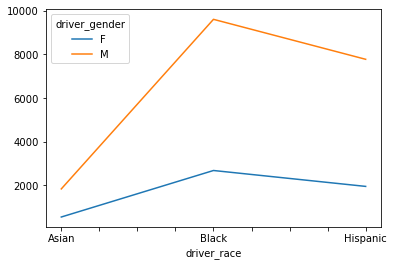

In [110]:
table.plot()
plt.show()

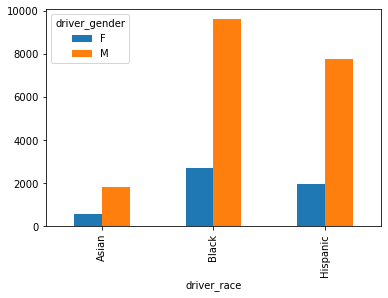

In [111]:
table.plot(kind='bar')
plt.show()

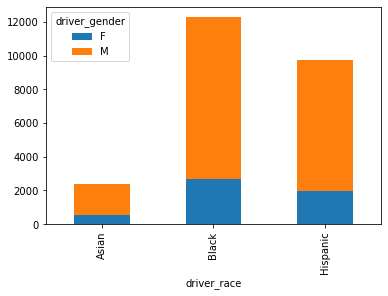

In [112]:
table.plot(kind='bar', stacked=True)
plt.show()

### How long might you be stopped for a violation?

### Analyzing an object column

In [126]:
apple.head()

,date,time,price,volume,change,is_up
date_and_time,,,,,,
2018-02-13 16:00:00,2/13/2018,16:00,164.34,21075906,up,True
2018-02-14 16:00:00,2/14/2018,16:00,167.37,62531550,up,True
2018-02-15 16:00:00,2/15/2018,16:00,172.99,27979650,up,True
2018-03-13 16:00:00,3/13/2018,16:00,173.45,31095700,up,True
2018-03-14 16:00:00,3/14/2018,16:00,174.60,43156892,up,True


In [114]:
apple.change.dtype

dtype('O')

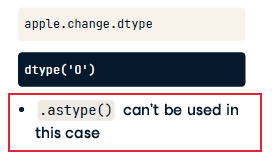

In [117]:
mapping = {'up':True, 'down':False}
apple['is_up'] = apple.change.map(mapping)
apple.head()

,date,time,price,volume,change,is_up
date_and_time,,,,,,
2018-02-13 16:00:00,2/13/2018,16:00,164.34,21075906,up,True
2018-02-14 16:00:00,2/14/2018,16:00,167.37,62531550,up,True
2018-02-15 16:00:00,2/15/2018,16:00,172.99,27979650,up,True
2018-03-13 16:00:00,3/13/2018,16:00,173.45,31095700,up,True
2018-03-14 16:00:00,3/14/2018,16:00,174.60,43156892,up,True


In [116]:
apple.is_up.mean()

0.6666666666666666

In [120]:
ri.groupby('violation').search_conducted.mean()

violation
Equipment              0.064274
Moving violation       0.057014
Other                  0.045351
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

In [121]:
search_rate = ri.groupby('violation').search_conducted.mean()

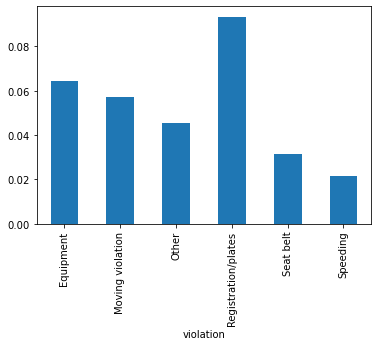

In [122]:
search_rate.plot(kind='bar')
plt.show()

In [123]:
search_rate.sort_values()

violation
Speeding               0.021560
Seat belt              0.031513
Other                  0.045351
Moving violation       0.057014
Equipment              0.064274
Registration/plates    0.093438
Name: search_conducted, dtype: float64

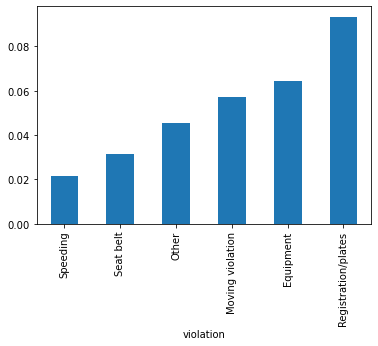

In [124]:
search_rate.sort_values().plot(kind='bar')
plt.show()

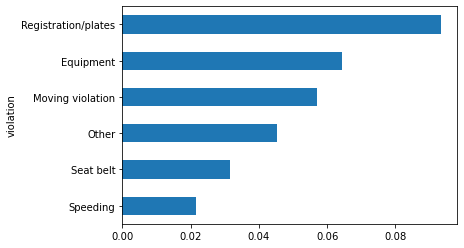

In [125]:
search_rate.sort_values().plot(kind='barh')
plt.show()